# Lista de Exercício 07
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 1 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Thallys Oliveira`

`Número USP: 11819827`

# 1) Rede Neural Convolucional (CNN)

Este exercício demonstra o treinamento de uma Rede Neural Convolucional (CNN) simples para classificar imagens de um banco de dados chamado [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). Utilizaremos uma biblioteca chamada [Keras](https://www.tensorflow.org/guide/keras/overview) para criar e treinar o modelo.

**Referências:**

*   Tensorflow  - [CNN](https://www.tensorflow.org/tutorials/images/cnn)
*   Tensorflow  - [Image classification](https://www.tensorflow.org/tutorials/keras/classification#build_the_model)

Vamos importar as bibliotecas que iremos utilizar para a rede neural:

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

#bibliotecas para Cluster Analysis
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

## 1.1) DATASET

O conjunto de dados (*dataset*) Fashion MNIST contém 70.000 imagens grayscale de 10 classes, conforme mostrado na Tabela 2. O conjunto de dados é dividido em 60.000 imagens de treinamento e 10.000 imagens de teste.

<center><figcaption><b> Tabela 2: </b> Classes e seus respectivos rótulos.</b></figcaption>
</figure>

| Classe          | Rotulo (label) |
|-----------------|----------------|
| T-shirt/top     |        0       |
| Trouser         |        1       |
| Pullover        |        2       |
| Dress           |        3       |
| Coat            |        4       |
| Sandal          |        5       |
| Shirt           |        6       |
| Sneaker         |        7       |
| Bag             |        8       |
| Ankle Boot      |        9       |
</center>

**Exercício:**

* Mostre o formato, o tipo e valores máximo e mínimo das variáveis train_images e train_labels. Plote uma imagem qualquer e coloque em seu título o respectivo label.

* Mostre o formato, o tipo e valores máximo e mínimo das variáveis test_images e test_labels. Plote uma imagem qualquer e coloque em seu título o respectivo label.

In [15]:
# Matriz contendo os rótulos, em ordem, conforme Tabela 2
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Carrega a base de dados FASHION_MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

## -- Seu código começa AQUI -- ##


print("Datasets: Train Images (Imagens de Treinamento):")
print("Quantidade de imagens para treinamento", train_images.shape[0])
print("Largura {} e Altura {} de cada imagem".format(train_images.shape[1], train_images.shape[2]))
print("Formato: ", type(train_images))
print("Máximo {} e Mínimo {}". format(np.max(train_images), np.min(train_images)))
print("\n")
print("Datasets: Train Labels (Labels das Imagens):")
print("Quantidade de labels:", train_labels.shape[0])
print("Formato: ", type(train_labels))
print("\n")

print("Datasets: Test Images (Imagens de Test):")
print("Quantidade de imagens para treino", test_images.shape[0])
print("Largura {} e Altura {} de cada imagem".format(test_images.shape[1], test_images.shape[2]))
print("Formato: ", type(test_images))
print("Máximo {} e Mínimo {}". format(np.max(test_images), np.min(test_images)))
print("\n")
print("Datasets: Train Labels (Labels das Imagens):")
print("Quantidade de labels:", test_labels.shape[0])
print("Formato: ", type(test_labels))
print("\n")
## -- Seu código termina AQUI -- ##

Datasets: Train Images (Imagens de Treinamento):
Quantidade de imagens para treinamento 60000
Largura 28 e Altura 28 de cada imagem
Formato:  <class 'numpy.ndarray'>
Máximo 255 e Mínimo 0


Datasets: Train Labels (Labels das Imagens):
Quantidade de labels: 60000
Formato:  <class 'numpy.ndarray'>


Datasets: Test Images (Imagens de Test):
Quantidade de imagens para treino 10000
Largura 28 e Altura 28 de cada imagem
Formato:  <class 'numpy.ndarray'>
Máximo 255 e Mínimo 0


Datasets: Train Labels (Labels das Imagens):
Quantidade de labels: 10000
Formato:  <class 'numpy.ndarray'>




Text(0.5, 1.0, 'Imagem de Teste: 25 - Classe: trouser')

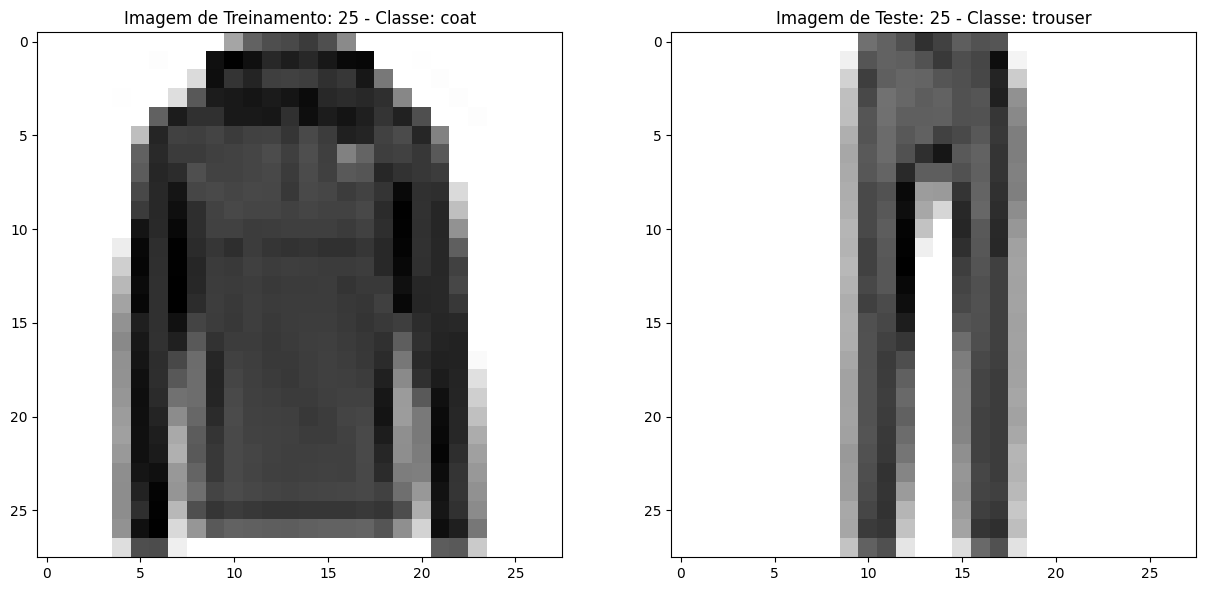

In [28]:
# Plotando as imagens

posicao_treino = 25 #Lembranco que posicao >=1
posicao_test = 25

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.imshow(train_images[posicao_treino-1],cmap = plt.cm.binary)
plt.title("Imagem de Treinamento: {} - Classe: {}".format(posicao_treino,class_names[train_labels[posicao_treino-1]]))

plt.subplot(2,2,2)
plt.imshow(test_images[posicao_test-1],cmap = plt.cm.binary)
plt.title("Imagem de Teste: {} - Classe: {}".format(posicao_test,class_names[test_labels[posicao_test-1]]))


#### *Inspeção do dataset*

Vamos inspecionar as 25 primeiras imagens do conjunto de treinamento.

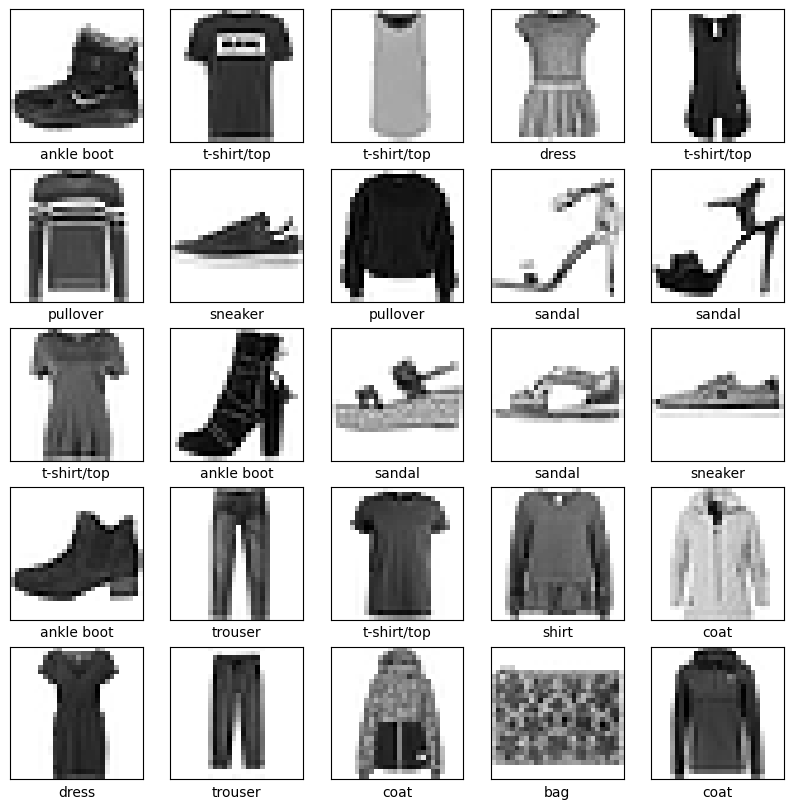

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 1.2) MODELO

Podemos construir um modelo utilizando blocos da biblioteca Keras importada logo no início deste notebook. A construção é sequencial, ou seja, vamos adicionando camadas (layers) ao modelo. Existem diversos tipos de camadas, com funções diversas. Vamos usar aqui as camadas de convolução, de pooling, de achatamento e densa. Repare que todas estas, exceto a camada de pooling, tem seus pesos ajustados durante o treinamento. O desafio é encontrar uma combinação de camadas (arquitetura) que torne a generalização do seu modelo eficiente.

Vamos criar dois modelos diferentes de classificadores para entender o efeito da arquitetura no resultado. Queremos que a rede aprenda a diferenciar dentre as 10 classes do dataset importado anteriomente.

A função a seguir constrói o modelo conforme os parâmetros de entrada, sendo:

* `input_shape`: formato dos dados de entrada
* `n_classes`: número de classes de saída
* `n_filtros_conv`: lista 1D contendo o número de filtros a serem utilizados na camada de convolução. Note que o tamanho desta matriz vai ditar quantas camadas deste tipo devem ser adicionadas ao modelo. Fixamos o tamanho do kernel do filtro em 3.
* `n_filtros_dense`: lista 1D contendo o número de neurônios a serem utilizados na camada densa. Note que o tamanho desta matriz vai ditar quantas camadas deste tipo devem ser adicionadas ao modelo.

In [29]:
def build_model(input_shape, n_classes, n_filtros_conv, n_filtros_dense):
  '''
  layers.Conv2D       -> Camada de convolução
  layers.MaxPooling2D -> Camada de "pooling"
  layers.Flatten      -> Camada de achatamento
  layers.Dense        -> Camada de neurônios
  '''

  kernel_size = 3

  modelo = models.Sequential()

  for idx, filtro in enumerate(n_filtros_conv):
    if idx == 0:
       modelo.add(layers.Conv2D(filtro, kernel_size, activation='relu', input_shape=(input_shape[0],input_shape[1],1)))
       modelo.add(layers.MaxPooling2D((2, 2)))
    elif idx == len(n_filtros_conv)-1:
       modelo.add(layers.Conv2D(filtro, kernel_size, activation='relu'))
    else:
       modelo.add(layers.Conv2D(filtro, kernel_size, activation='relu'))
       modelo.add(layers.MaxPooling2D((2, 2)))

  modelo.add(layers.Flatten())

  if len(n_filtros_dense) == 0:
    modelo.add(layers.Dense(n_classes))
  else:
    for idx, filtro in enumerate(n_filtros_dense):
      if idx == len(n_filtros_dense)-1:
        modelo.add(layers.Dense(n_classes))
      else:
        modelo.add(layers.Dense(filtro, activation='relu'))

  modelo.summary()

  return modelo

**Exercício - modelo_1:**

Utilizando a função dada acima, construa o primeiro modelo e o atribua a uma variável chamada `modelo_1`. Utilize as informações do dataset importado para configurar os parâmetros da função.

Neste modelo, utilizaremos apenas 1 camada de convolução com 4 filtros e 1 camada densa com 32 neurônios.

Em seguida, o modelo deve ser compilado. Como loss, utilizaremos a entropia cruzada (com otimizador Adam) e a métrica a ser usada na avaliação será a acurácia.

In [40]:
# Número de classes para classificar
n_classes = 10
# Formato da imagem que sera input da rede
input_shape = (train_images.shape[1],train_images.shape[2])
print(input_shape)

# Número de filtros em cada camada de convolução
n_filtros_conv = [4]
# Número de filtros dense
n_filtros_dense = [32]

modelo_1 = build_model(input_shape, n_classes, n_filtros_conv, n_filtros_dense)

# Compila o modelo com o otimizador Adam,
# função de perda Sparse Categorical Crossentropy e
# monitora o modelo através da acurácia
modelo_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print("Modelo 1 compilado!")

(28, 28)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 676)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 1 compilado!


**Exercício - modelo_2:**

Agora construa o segundo modelo e o atribua a uma variável chamada `modelo_2`. Utilize as mesmas informações da dataset importado para configurar os parâmetros da função.

Neste modelo, utilizaremos 3 camadas de convolução com 16, 32 e 32 filtros e 3 camadas densas com 64 neurônios cada uma. Em seguida, o modelo deve ser compilado. Como loss, utilizaremos a entropia cruzada (com otimizador Adam) e a métrica a ser usada na avaliação será a acurácia.

In [32]:
# Modelo 2
n_filtros_conv = [32,64,64]
n_filtros_dense = [64,64,128]

modelo_2 = build_model(input_shape, n_classes, n_filtros_conv, n_filtros_dense)

modelo_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print("Modelo 2 compilado!")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

## 1.3) TREINAMENTO

Vamos realizar o treinamento dos dois modelos criados durante 50 épocas. Uma época significa que todas as amostras do dataset passaram pela rede. Para avaliarmos como anda o treinamento, precisamos calcular uma métrica a cada época - validação. Para isso, vamos separar 10% do dataset de treinamento para este subset. Na função `fit` existe esta opção disponível.  

`metricas = modelo.fit(images, lavels, epochs, validation_split=0.1)`

**Exercício:**

Complete o código a seguir para prosseguir com o treinamento de ambos os modelos (separadamente), conforme orientação acima. No final de cada treinamento serão plotados os gráficos de loss e acurácia tanto do treinamento quanto da validação.

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 3.5433 - accuracy: 0.7439 - val_loss: 0.6106 - val_accuracy: 0.8068
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5004 - accuracy: 0.8306 - val_loss: 0.4343 - val_accuracy: 0.8520
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4252 - accuracy: 0.8518 - val_loss: 0.3891 - val_accuracy: 0.8590
Epoch 4/50
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8631 - val_loss: 0.4078 - val_accuracy: 0.8540
Epoch 5/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3656 - accuracy: 0.8713 - val_loss: 0.3988 - val_accuracy: 0.8570
Epoch 6/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3490 - accuracy: 0.8754 - val_loss: 0.3896 - val_accuracy: 0.8642
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3382 - accuracy: 0.8807 - val_loss: 0.3648 - val_accuracy

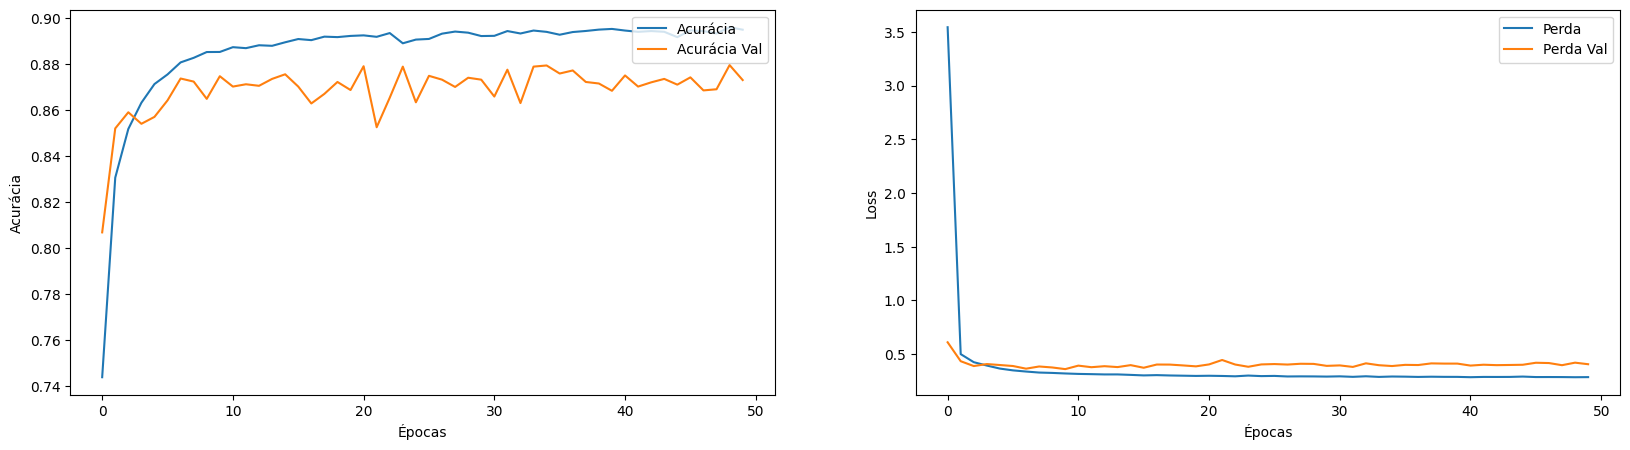

In [41]:
## --- MODELO 1 ---

## -- Seu código começa AQUI -- ##

n_epochs = 50

metricas = modelo_1.fit(train_images, train_labels, validation_split=0.1, epochs=n_epochs)

## -- Seu código termina AQUI -- ##

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(metricas.history['accuracy'], label='Acurácia')
plt.plot(metricas.history['val_accuracy'], label='Acurácia Val')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(metricas.history['loss'], label='Perda')
plt.plot(metricas.history['val_loss'], label='Perda Val')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(loc='upper right')


Epoch 1/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.6746 - val_accuracy: 0.8907
Epoch 2/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.5770 - val_accuracy: 0.9008
Epoch 3/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.6503 - val_accuracy: 0.8888
Epoch 4/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0509 - accuracy: 0.9831 - val_loss: 0.7310 - val_accuracy: 0.8955
Epoch 5/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.6546 - val_accuracy: 0.8983
Epoch 6/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.5703 - val_accuracy: 0.9022
Epoch 7/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.5899 - val_accu

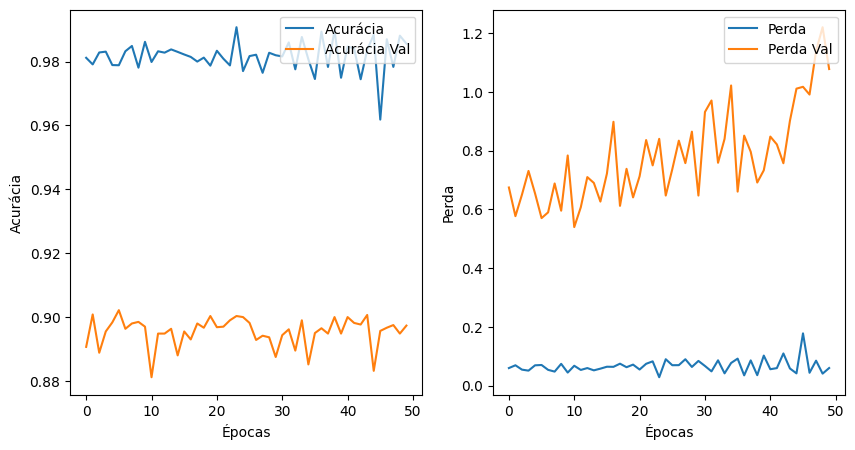

In [47]:

## --- MODELO 2 ---

## -- Seu código começa AQUI -- ##

n_epochs = 50

metricas = modelo_2.fit(train_images, train_labels, validation_split=0.1, epochs=n_epochs)

## -- Seu código termina AQUI -- ##

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(metricas.history['accuracy'], label='Acurácia')
plt.plot(metricas.history['val_accuracy'], label='Acurácia Val')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(metricas.history['loss'], label='Perda')
plt.plot(metricas.history['val_loss'], label='Perda Val')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc='upper right')

**Exercício:**

* Com base nos gráficos mostrados acima, qual modelo você escolheria para utilizar? Justifique o motivo. [Aqui](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) você pode encontrar mais informações sobre como analisar os resultados do treinamento.

In [44]:
## RESPOSTA: Analisando os gráficos acima, o modelo 1 é melhor que o modelo 2, visto que no segundo ocorreu maiores perdas e uma maior diferença de acurácia, que quando analisando no primeiro modelo, temos um melhor desenpenho.

### Comentário:
Analisando os gráficos acima, o modelo 1 é melhor que o modelo 2, visto que no segundo ocorreu maiores perdas e uma maior diferença de acurácia, que quando analisando no primeiro modelo, temos um melhor desempenho.

## 1.4) TESTE

Utilizando o modelo escolhido (modelo_1 ou modelo_2), verifique a acurácia do modelo a respeito do dataset de teste. Para isso, podemos usar uma função da biblioteca também já disponibilizada `model.evaluate()`. Ela retorna os valores de loss e acurácia para o dataset utilizado. Utilize todo o dataset de teste para esta avaliação.

`loss, acc = model.evaluate(images, labels)`

In [49]:
## -- Seu código começa AQUI -- ##

loss_1, acc_1 = modelo_1.evaluate(test_images, test_labels)

loss_2, acc_2 = modelo_2.evaluate(test_images, test_labels)

## -- Seu código termina AQUI -- ##

313/313 [==============================] - 1s 3ms/step - loss: 1.0839 - accuracy: 0.8945


Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens. Para isso, vamos utilizar o método `model.predict`. O modelo tem como saída, dados do tipo [logits](https://developers.google.com/machine-learning/glossary#logits). Para transformar esses dados em probabilidades, anexe uma camada [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax), que são mais fáceis de interpretar.

1/1 [==============================] - 0s 120ms/step


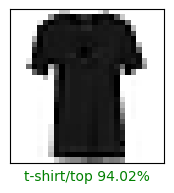

In [50]:
#@title Escolha uma imagem para a previsão { run: "auto" }

# Configure aqui o modelo escolhido (modelo_1 ou modelo_2)
modelo = modelo_1

imgIndex = 2677 #@param {type:"slider", min:0, max:9999, step:1}

imgInput = test_images[imgIndex:imgIndex+1,:]

# Anexa uma camada softmax
modelo_probabilidade = tf.keras.Sequential([modelo, tf.keras.layers.Softmax()])

# Faz a previsao
probs = modelo_probabilidade.predict(imgInput)

# Encontra qual o índice com a maior probabilidade
classe_pred = np.argmax(probs)

# Mostra a figura
plt.figure(figsize=(2,2))
plt.imshow(imgInput[0,:], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
string = class_names[classe_pred] + " {:.2f}%".format(probs[0,classe_pred] *100)


# A imagem foi classificada corretamente?
if class_names[test_labels[imgIndex]] == class_names[classe_pred]:
  # Se sim, mostre a legenda como verde
  plt.xlabel(string ,color='green')
else:
  # Se nao, mostre a legenda como vermelha
  plt.xlabel(string,color='red')
  print("O correto seria: ", class_names[test_labels[imgIndex]])
